# 3. Machine Learning for Classification
## Homework

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [6]:
# Select only the features from above
features = ['longitude','latitude','housing_median_age','total_rooms',\
            'total_bedrooms','population','households','median_income', 'median_house_value', 'ocean_proximity']
df = df[features]

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Fill in the missing values with 0
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [9]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [10]:
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [11]:
# Create a new column population_per_household by dividing the column population by the column households from dataframe
df['population_per_household'] = df['population'] / df['households']

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

In [13]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

**Answer 1.** The most frequent observation (mode) for the column ocean_proximity is **<1H OCEAN**.

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [15]:
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train,test_size=0.25, random_state=42)

In [16]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [20]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [21]:
numerical_features = df.columns.to_list()
numerical_features.remove('ocean_proximity')
categorical_features = ['ocean_proximity']
numerical_features.remove('median_house_value')
numerical_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [22]:
correlation_matrix = df_train[numerical_features].corr()
display(correlation_matrix)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


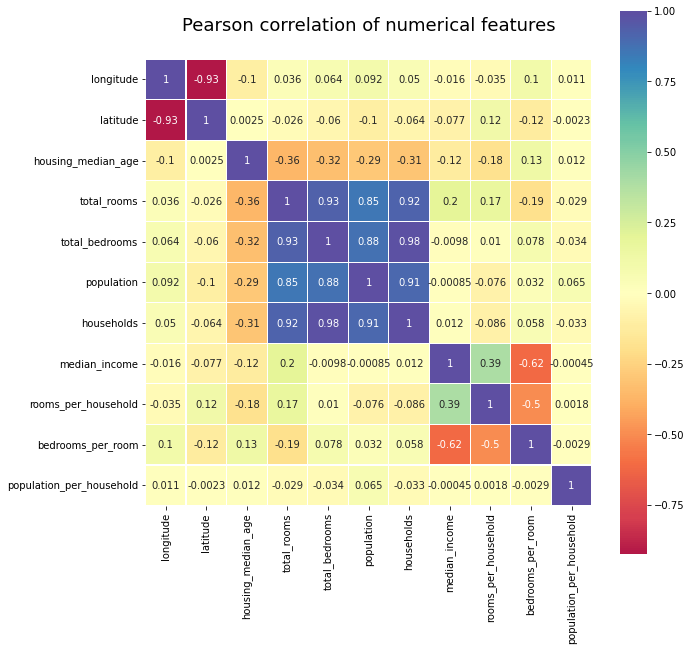

In [23]:
plt.figure(figsize=(10,10))
plt.title("Pearson correlation of numerical features", y=1.05, size=18)
sns.heatmap(correlation_matrix, center=0, cmap='Spectral', linewidths=0.1,
            square=True, linecolor='white', annot=True);

**Answer 2.** The two features that have the biggest correlation in this dataset are **`total_bedrooms` and `households`**.

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [24]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [25]:
median_house_value_mean = y_train.mean()
above_average_train = (y_train >= median_house_value_mean).astype(int)
above_average_train

array([1, 1, 0, ..., 1, 0, 0])

In [26]:
above_average_val = (y_val >= median_house_value_mean).astype(int)
above_average_test = (y_test >= median_house_value_mean).astype(int)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

In [27]:
def mutual_info_price_score(series):
    return mutual_info_score(series, above_average_train)

Remember that we have only one categorical variable - 'ocean_proximity'.

In [28]:
# categorical_features = ['ocean_proximity']
round(df_train[categorical_features].apply(mutual_info_price_score), 2)

ocean_proximity    0.1
dtype: float64

**Answer 3.** The value of mutual information between 'median_house_value' and 'ocean_proximity' is **0.1**.

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [31]:
val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [33]:
model.fit(X_train, above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
y_pred = model.predict_proba(X_val)[:,1]

In [35]:
price_decision = (y_pred >= 0.5)
price_decision

array([False, False,  True, ...,  True,  True, False])

In [36]:
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
acc_total = (above_average_val == price_decision).mean().round(2)
acc_total

0.84

In [37]:
# Let's check using sklearn.metrics function accuracy_score
accuracy_score(above_average_val, model.predict(X_val)).round(2)

0.84

**Answer 4.** The accuracy on the validation dataset is **0.84**.

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`


In [38]:
(categorical_features + numerical_features)

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [39]:
def feature_elimination_score(feature):
    used_features = categorical_features + numerical_features
    used_features.remove(feature)
    df_train_elim = df_train[used_features]
    
    dv = DictVectorizer(sparse=False)
    
    train_elim_dict = df_train_elim.to_dict(orient='records')
    X_train_elim = dv.fit_transform(train_elim_dict)
    
    df_val_elim = df_val[used_features]
    val_elim_dict = df_val_elim.to_dict(orient='records')
    X_val_elim = dv.transform(val_elim_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    
    model.fit(X_train_elim, above_average_train)
    y_pred_elim = model.predict_proba(X_val_elim)[:,1]
    
    price_decision_elim = (y_pred_elim >= 0.5)
    
    acc_score = (above_average_val == price_decision_elim).mean()
    
    return acc_score

In [40]:
for feature in (categorical_features + numerical_features):
    print(f"Accuracy after the elimination of '{feature}' is {feature_elimination_score(feature)}.")

Accuracy after the elimination of 'ocean_proximity' is 0.8204941860465116.
Accuracy after the elimination of 'longitude' is 0.8323643410852714.
Accuracy after the elimination of 'latitude' is 0.8321220930232558.
Accuracy after the elimination of 'housing_median_age' is 0.8313953488372093.
Accuracy after the elimination of 'total_rooms' is 0.8376937984496124.
Accuracy after the elimination of 'total_bedrooms' is 0.8374515503875969.
Accuracy after the elimination of 'population' is 0.8263081395348837.
Accuracy after the elimination of 'households' is 0.8333333333333334.
Accuracy after the elimination of 'median_income' is 0.7863372093023255.
Accuracy after the elimination of 'rooms_per_household' is 0.8345445736434108.
Accuracy after the elimination of 'bedrooms_per_room' is 0.8347868217054264.
Accuracy after the elimination of 'population_per_household' is 0.8359980620155039.


In [41]:
question_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

acc_diff = []
for feature in question_features:
    acc_diff.append(acc_total - feature_elimination_score(feature))

print(f"The smallest difference has '{question_features[acc_diff.index(min(acc_diff))]}'.")

The smallest difference has 'total_rooms'.


**Answer 5.** The smallest difference has the elimination of **'total_rooms'**.

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.


In [42]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)
y_test_log = np.log(y_test)

In [43]:
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)    
    model.fit(X_train, y_train_log)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(((y_pred - y_val_log)**2).mean())
    
    print(f'RMSE of Ridge regression with alpha {a} is {rmse.round(3)}')

RMSE of Ridge regression with alpha 0 is 0.524
RMSE of Ridge regression with alpha 0.01 is 0.524
RMSE of Ridge regression with alpha 0.1 is 0.524
RMSE of Ridge regression with alpha 1 is 0.524
RMSE of Ridge regression with alpha 10 is 0.524


**Answer 6.** The smallest `alpha` that leads to the best RMSE on the validation set is **0**.